<a href="https://colab.research.google.com/github/dymiyata/intro-to-ml-and-ai-2025-2026/blob/main/mulitple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

Import the usual stuff.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

We'll use the penguins dataset again

In [6]:
df = sns.load_dataset("penguins").dropna()

In [7]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Let's predict `"body_mass_g"` using `"bill_length_mm"`, `"bill_depth_mm"`, and `"flipper_length_mm"` as features.

I'll also use `DataFrame.to_numpy()` to convert these to numpy arrays to make working with them a bit easier

In [12]:
X_train = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].to_numpy()
Y_train = df["body_mass_g"].to_numpy()

Now let's define the model

In [13]:
model = LinearRegression()

Train the model

In [14]:
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
print(model.coef_)
print(model.intercept_)

[ 3.29286254 17.83639105 50.76213167]
-6445.476043030182


Store the predicted values in `Y_pred`

In [17]:
Y_pred = model.predict(X_train)

Compute the MSE for this model

In [18]:
mean_squared_error(Y_train, Y_pred)

152597.33274339666

Now let's compare this to a linear regression model where we only use the first feature (bill length) and see which performs better.

In [23]:
X1 = X_train[:,0:1]
model2 = LinearRegression()
model2.fit(X1, Y_train)
Y_pred2 = model2.predict(X1)

Compute MSE For this model

In [24]:
mean_squared_error(Y_train, Y_pred2)

421823.2218866911

Now let's make a scatter plot for the predicted values of both models along with the actual values.  To do this we will just plot the target (body mass) vs just the first feature (bill length).

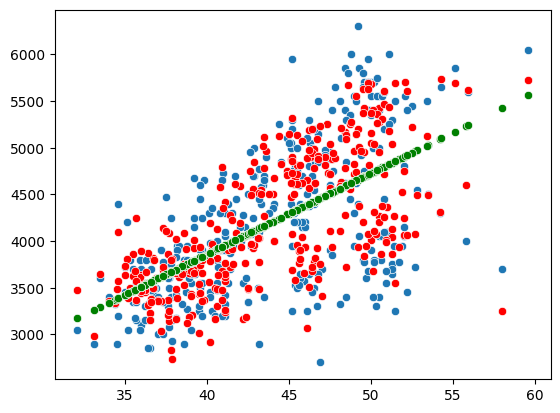

In [26]:
sns.scatterplot(x=X1[:,0], y=Y_train)
sns.scatterplot(x=X1[:,0], y=Y_pred, color="red")
sns.scatterplot(x=X1[:,0], y=Y_pred2, color="green")
plt.show()

# Polynomial Regression

Now let's see how we can create new feaures from existing ones.

Here I am creating some simulated data

In [27]:
X_train_poly = np.linspace(-3, 3, 20)
Y_train_poly = 3 * X_train_poly + 5 * X_train_poly ** 2 + 7 + 6 * np.random.randn(20)

Let's visualize a scatter plot of this data.

<Axes: >

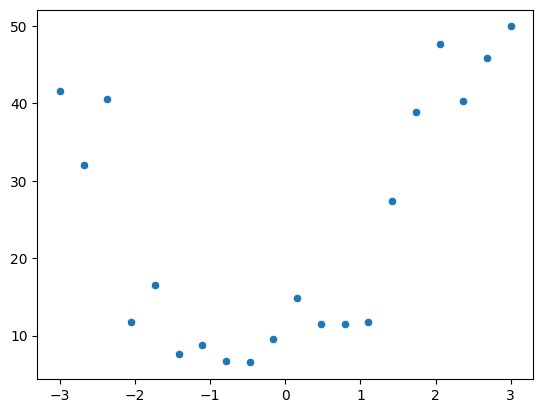

In [28]:
sns.scatterplot(x=X_train_poly, y=Y_train_poly)

Now let's create a linear regression model for this data.  

In [29]:
model_poly = LinearRegression()

Because of how the data was created, we need to add $x^2$ as a feature to our feature matrix.  To do this we can use `np.column_stack()` and pass as a argument, a list of all the arrays we want to be the columns of our matrix.  

Let's save the feature matrix in a variable called `poly_features`

In [30]:
poly_features = np.column_stack([X_train_poly, X_train_poly ** 2])
poly_features[0:5]

array([[-3.        ,  9.        ],
       [-2.68421053,  7.20498615],
       [-2.36842105,  5.60941828],
       [-2.05263158,  4.2132964 ],
       [-1.73684211,  3.0166205 ]])

Now we train the model using `poly_features` as the feature matrix.

In [31]:
model.fit(poly_features, Y_train_poly)

LinearRegression()

To visualize our model, we can save the predicted values in an array. Then plot the prediction over the actual data.

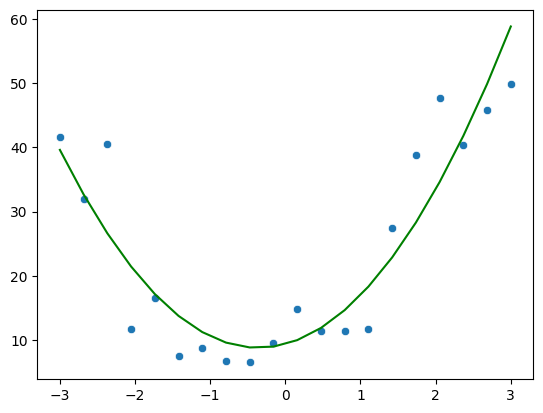

In [33]:
Y_pred_poly = model.predict(poly_features)
sns.scatterplot(x=X_train_poly, y=Y_train_poly)
sns.lineplot(x=X_train_poly, y=Y_pred_poly, color="green")
plt.show()

## Overfitting

Sometimes if you add too many features, this can lead to over fitting.  

Let's see what would happen if instead of just $x$ and $x^2$ as features, we also used:
$$ x^3, x^4, x^5, \dots, x^{20} $$

so our model is a degree 20 polynomial.

In [36]:
features_20 = np.column_stack([X_train_poly ** n for n in range(1,20)])


In [37]:
model_poly.fit(features_20, Y_train_poly)
Y20 = model_poly.predict(features_20)

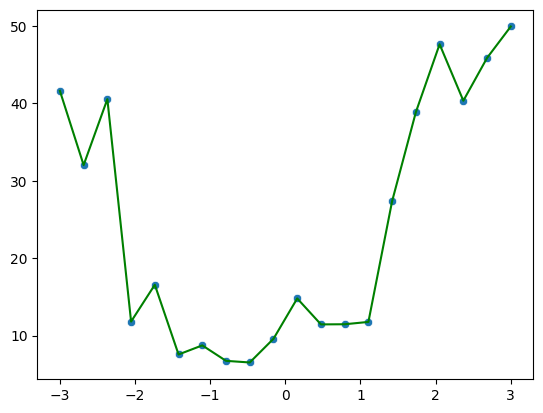

In [38]:
sns.scatterplot(x=X_train_poly, y=Y_train_poly)
sns.lineplot(x=X_train_poly, y=Y20, color="green")
plt.show()